In [1]:
import re
import dir_constants as dc
from tqdm import tqdm
from j_utils import munging as mg
from j_utils import eval_results as er
# from fastai_old.structured import *

pd.options.display.max_columns = 999
# pd.options.display.max_rows = 999
pd.options.display.max_seq_items = None
# np.set_printoptions(threshold=100)

In [2]:
# # %load /home/justin/fastai_old/fastai/structured.py
# from .imports import *

# from sklearn_pandas import DataFrameMapper
# from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
# from pandas.api.types import is_string_dtype, is_numeric_dtype
# from sklearn.ensemble import forest
# from sklearn.tree import export_graphviz


# def set_plot_sizes(sml, med, big):
#     plt.rc('font', size=sml)          # controls default text sizes
#     plt.rc('axes', titlesize=sml)     # fontsize of the axes title
#     plt.rc('axes', labelsize=med)    # fontsize of the x and y labels
#     plt.rc('xtick', labelsize=sml)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=sml)    # fontsize of the tick labels
#     plt.rc('legend', fontsize=sml)    # legend fontsize
#     plt.rc('figure', titlesize=big)  # fontsize of the figure title

# def parallel_trees(m, fn, n_jobs=8):
#         return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

# def draw_tree(t, df, size=10, ratio=0.6, precision=0):
#     """ Draws a representation of a random forest in IPython.

#     Parameters:
#     -----------
#     t: The tree you wish to draw
#     df: The data used to train the tree. This is used to get the names of the features.
#     """
#     s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
#                       special_characters=True, rotate=True, precision=precision)
#     IPython.display.display(graphviz.Source(re.sub('Tree {',
#        f'Tree {{ size={size}; ratio={ratio}', s)))

# def combine_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
#               seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
#     years = np.asarray(years) - 1970
#     months = np.asarray(months) - 1
#     days = np.asarray(days) - 1
#     types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
#              '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
#     vals = (years, months, days, weeks, hours, minutes, seconds,
#             milliseconds, microseconds, nanoseconds)
#     return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
#                if v is not None)

# def get_sample(df,n):
#     """ Gets a random sample of n rows from df, without replacement.

#     Parameters:
#     -----------
#     df: A pandas data frame, that you wish to sample from.
#     n: The number of rows you wish to sample.

#     Returns:
#     --------
#     return value: A random sample of n rows of df.

#     Examples:
#     ---------
#     >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
#     >>> df
#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     >>> get_sample(df, 2)
#        col1 col2
#     1     2    b
#     2     3    a
#     """
#     idxs = sorted(np.random.permutation(len(df))[:n])
#     return df.iloc[idxs].copy()

# def add_datepart(df, fldname, drop=True, time=False):
#     """add_datepart converts a column of df from a datetime64 to many columns containing
#     the information from the date. This applies changes inplace.

#     Parameters:
#     -----------
#     df: A pandas data frame. df gain several new columns.
#     fldname: A string that is the name of the date column you wish to expand.
#         If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
#     drop: If true then the original date column will be removed.
#     time: If true time features: Hour, Minute, Second will be added.

#     Examples:
#     ---------

#     >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
#     >>> df

#         A
#     0   2000-03-11
#     1   2000-03-12
#     2   2000-03-13

#     >>> add_datepart(df, 'A')
#     >>> df

#         AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
#     0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
#     1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
#     2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
#     """
#     fld = df[fldname]
#     if not np.issubdtype(fld.dtype, np.datetime64):
#         df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
#     targ_pre = re.sub('[Dd]ate$', '', fldname)
#     attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
#     if time: attr = attr + ['Hour', 'Minute', 'Second']
#     for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
#     df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
#     if drop: df.drop(fldname, axis=1, inplace=True)

# def is_date(x): return np.issubdtype(x.dtype, np.datetime64)

# def train_cats(df):
#     """Change any columns of strings in a panda's dataframe to a column of
#     catagorical values. This applies the changes inplace.

#     Parameters:
#     -----------
#     df: A pandas dataframe. Any columns of strings will be changed to
#         categorical values.

#     Examples:
#     ---------

#     >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
#     >>> df
#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     note the type of col2 is string

#     >>> train_cats(df)
#     >>> df

#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     now the type of col2 is category
#     """
#     for n,c in df.items():
#         if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

# def apply_cats(df, trn):
#     """Changes any columns of strings in df into categorical variables using trn as
#     a template for the category codes.

#     Parameters:
#     -----------
#     df: A pandas dataframe. Any columns of strings will be changed to
#         categorical values. The category codes are determined by trn.

#     trn: A pandas dataframe. When creating a category for df, it looks up the
#         what the category's code were in trn and makes those the category codes
#         for df.

#     Examples:
#     ---------
#     >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
#     >>> df
#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     note the type of col2 is string

#     >>> train_cats(df)
#     >>> df

#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     now the type of col2 is category {a : 1, b : 2}

#     >>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
#     >>> apply_cats(df2, df)

#            col1 col2
#         0     1    b
#         1     2    a
#         2     3    a

#     now the type of col is category {a : 1, b : 2}
#     """
#     for n,c in df.items():
#         if (n in trn.columns) and (trn[n].dtype.name=='category'):
#             df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)

# def fix_missing(df, col, name, na_dict):
#     """ Fill missing data in a column of df with the median, and add a {name}_na column
#     which specifies if the data was missing.

#     Parameters:
#     -----------
#     df: The data frame that will be changed.

#     col: The column of data to fix by filling in missing data.

#     name: The name of the new filled column in df.

#     na_dict: A dictionary of values to create na's of and the value to insert. If
#         name is not a key of na_dict the median will fill any missing data. Also
#         if name is not a key of na_dict and there is no missing data in col, then
#         no {name}_na column is not created.


#     Examples:
#     ---------
#     >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
#     >>> df
#        col1 col2
#     0     1    5
#     1   nan    2
#     2     3    2

#     >>> fix_missing(df, df['col1'], 'col1', {})
#     >>> df
#        col1 col2 col1_na
#     0     1    5   False
#     1     2    2    True
#     2     3    2   False


#     >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
#     >>> df
#        col1 col2
#     0     1    5
#     1   nan    2
#     2     3    2

#     >>> fix_missing(df, df['col2'], 'col2', {})
#     >>> df
#        col1 col2
#     0     1    5
#     1   nan    2
#     2     3    2


#     >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
#     >>> df
#        col1 col2
#     0     1    5
#     1   nan    2
#     2     3    2

#     >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
#     >>> df
#        col1 col2 col1_na
#     0     1    5   False
#     1   500    2    True
#     2     3    2   False
#     """
#     if is_numeric_dtype(col):
#         if pd.isnull(col).sum() or (name in na_dict):
#             df[name+'_na'] = pd.isnull(col)
#             filler = na_dict[name] if name in na_dict else col.median()
#             df[name] = col.fillna(filler)
#             na_dict[name] = filler
#     return na_dict

# def numericalize(df, col, name, max_n_cat):
#     """ Changes the column col from a categorical type to it's integer codes.

#     Parameters:
#     -----------
#     df: A pandas dataframe. df[name] will be filled with the integer codes from
#         col.

#     col: The column you wish to change into the categories.
#     name: The column name you wish to insert into df. This column will hold the
#         integer codes.

#     max_n_cat: If col has more categories than max_n_cat it will not change the
#         it to its integer codes. If max_n_cat is None, then col will always be
#         converted.

#     Examples:
#     ---------
#     >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
#     >>> df
#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     note the type of col2 is string

#     >>> train_cats(df)
#     >>> df

#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     now the type of col2 is category { a : 1, b : 2}

#     >>> numericalize(df, df['col2'], 'col3', None)

#        col1 col2 col3
#     0     1    a    1
#     1     2    b    2
#     2     3    a    1
#     """
#     if not is_numeric_dtype(col) and ( max_n_cat is None or col.nunique()>max_n_cat):
#         df[name] = col.cat.codes+1

# def scale_vars(df, mapper):
#     warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
#     if mapper is None:
#         map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
#         mapper = DataFrameMapper(map_f).fit(df)
#     df[mapper.transformed_names_] = mapper.transform(df)
#     return mapper

# def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
#             preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
#     """ proc_df takes a data frame df and splits off the response variable, and
#     changes the df into an entirely numeric dataframe.

#     Parameters:
#     -----------
#     df: The data frame you wish to process.

#     y_fld: The name of the response variable

#     skip_flds: A list of fields that dropped from df.

#     ignore_flds: A list of fields that are ignored during processing.

#     do_scale: Standardizes each column in df. Takes Boolean Values(True,False)

#     na_dict: a dictionary of na columns to add. Na columns are also added if there
#         are any missing values.

#     preproc_fn: A function that gets applied to df.

#     max_n_cat: The maximum number of categories to break into dummy values, instead
#         of integer codes.

#     subset: Takes a random subset of size subset from df.

#     mapper: If do_scale is set as True, the mapper variable
#         calculates the values used for scaling of variables during training time (mean and standard deviation).

#     Returns:
#     --------
#     [x, y, nas, mapper(optional)]:

#         x: x is the transformed version of df. x will not have the response variable
#             and is entirely numeric.

#         y: y is the response variable

#         nas: returns a dictionary of which nas it created, and the associated median.

#         mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
#         variables which is then used for scaling of during test-time.

#     Examples:
#     ---------
#     >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
#     >>> df
#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     note the type of col2 is string

#     >>> train_cats(df)
#     >>> df

#        col1 col2
#     0     1    a
#     1     2    b
#     2     3    a

#     now the type of col2 is category { a : 1, b : 2}

#     >>> x, y, nas = proc_df(df, 'col1')
#     >>> x

#        col2
#     0     1
#     1     2
#     2     1

#     >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
#                  children=[4., 6, 3, 3, 2, 3, 5, 4],
#                  salary=[90, 24, 44, 27, 32, 59, 36, 27])

#     >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
#                           ([:children], StandardScaler())])

#     >>>round(fit_transform!(mapper, copy(data)), 2)

#     8x4 Array{Float64,2}:
#     1.0  0.0  0.0   0.21
#     0.0  1.0  0.0   1.88
#     0.0  1.0  0.0  -0.63
#     0.0  0.0  1.0  -0.63
#     1.0  0.0  0.0  -1.46
#     0.0  1.0  0.0  -0.63
#     1.0  0.0  0.0   1.04
#     0.0  0.0  1.0   0.21
#     """
#     if not ignore_flds: ignore_flds=[]
#     if not skip_flds: skip_flds=[]
#     if subset: df = get_sample(df,subset)
#     ignored_flds = df.loc[:, ignore_flds]
#     df.drop(ignore_flds, axis=1, inplace=True)
#     df = df.copy()
#     if preproc_fn: preproc_fn(df)
#     if y_fld is None: y = None
#     else:
#         if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
#         y = df[y_fld].values
#         skip_flds += [y_fld]
#     df.drop(skip_flds, axis=1, inplace=True)

#     if na_dict is None: na_dict = {}
#     else: na_dict = na_dict.copy()
#     na_dict_initial = na_dict.copy()
#     for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
#     if len(na_dict_initial.keys()) > 0:
#         df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
#     if do_scale: mapper = scale_vars(df, mapper)
#     for n,c in df.items(): numericalize(df, c, n, max_n_cat)
#     df = pd.get_dummies(df, dummy_na=True)
#     df = pd.concat([ignored_flds, df], axis=1)
#     res = [df, y, na_dict]
#     if do_scale: res = res + [mapper]
#     return res

# def rf_feat_importance(m, df):
#     return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
#                        ).sort_values('imp', ascending=False)

# def set_rf_samples(n):
#     """ Changes Scikit learn's random forests to give each tree a random sample of
#     n random rows.
#     """
#     forest._generate_sample_indices = (lambda rs, n_samples:
#         forest.check_random_state(rs).randint(0, n_samples, n))

# def reset_rf_samples():
#     """ Undoes the changes produced by set_rf_samples.
#     """
#     forest._generate_sample_indices = (lambda rs, n_samples:
#         forest.check_random_state(rs).randint(0, n_samples, n_samples))

# def get_nn_mappers(df, cat_vars, contin_vars):
#     # Replace nulls with 0 for continuous, "" for categorical.
#     for v in contin_vars: df[v] = df[v].fillna(df[v].max()+100,)
#     for v in cat_vars: df[v].fillna('#NA#', inplace=True)

#     # list of tuples, containing variable and instance of a transformer for that variable
#     # for categoricals, use LabelEncoder to map to integers. For continuous, standardize
#     cat_maps = [(o, LabelEncoder()) for o in cat_vars]
#     contin_maps = [([o], StandardScaler()) for o in contin_vars]
#     return DataFrameMapper(cat_maps).fit(df), DataFrameMapper(contin_maps).fit(df)


In [3]:
def add_datepart(df, fldname, drop=True, time=False):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.

    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.

    Examples:
    ---------

    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df

        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13

    >>> add_datepart(df, 'A')
    >>> df

        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [4]:
PATH = dc.data_path
project = 'lendingclub'
fname_base_loan = 'base_loan_info.fth'
fname_eval_loan = 'eval_loan_info.fth'
fname_str_loan = 'str_loan_info.fth'
fname_scl_pmt = 'scaled_pmt_hist.fth'
data_path = f'{PATH}{project}'

In [5]:
base_loan_info = pd.read_feather(f'{data_path}/base_loan_info.fth')
eval_loan_info = pd.read_feather(f'{data_path}/eval_loan_info.fth')
str_loan_info = pd.read_feather(f'{data_path}/str_loan_info.fth')

In [6]:
# if I drop fico range low, does fico range high take on full importance?
base_loan_info.drop('fico_range_low', axis=1, inplace=True)

# all information from grade should be captured in subgrade. drop grade?
base_loan_info.drop('grade', axis=1, inplace=True)

In [7]:
scaled_pmt_hist = pd.read_feather(f'{data_path}/scaled_pmt_hist.fth')

# cut to done loans before doing EDA, since we don't know default or not about ongoing loans

In [8]:
eval_loan_info['target_strict'].fillna(0, inplace=True)

In [9]:
# get loans that are >= .95 maturity time, maturity paid, or status is in defaulted, charged_off, paid
done_loan_ids = eval_loan_info[(eval_loan_info['maturity_time'] >= .95) |
#                                (eval_loan_info['maturity_paid'] >= .95) |
                               (eval_loan_info['loan_status'].isin(['paid', 'charged_off', 'defaulted']))
                              ]['id'].values

In [10]:
# eval_loan_info[eval_loan_info['target_strict'].isnull()]['loan_status'].value_counts(dropna=False)

In [11]:
done_loans = base_loan_info[base_loan_info['id'].isin(done_loan_ids)]
done_eval_loans = eval_loan_info[eval_loan_info['id'].isin(done_loan_ids)]

In [12]:
# done_eval_loans['target_strict'].value_counts(dropna=False)

# first of all, do non_money cols change ever over time for a loan?
## No, so just drop all these cols and get it from loan_info instead

In [ ]:
loan_info_overlap_cols = ['addr_state', 'current_policy', 'dq_24m', 'dti', 'emp_len', 'home_ownership', 'int_rate', 'm_income', 'm_since_dq', 'm_since_rec', 'open_credit_lines', 'revol_line_util', 'total_credit_lines', ]

In [ ]:
# id_grouped = scaled_pmt_hist.groupby('id')
# ids_multicol_dict = {}
# for ids, group in tqdm(id_grouped):
#     multi_cols = []
#     for col in non_money_cols:
#         if group[col].nunique() > 1:
#             multi_cols.append(col)
#     if len(multi_cols) > 0:
#         ids_multicol_dict[ids] = multi_cols

In [ ]:
scaled_pmt_hist = scaled_pmt_hist[[col for col in scaled_pmt_hist.columns if col not in loan_info_overlap_cols]]

In [ ]:
scaled_pmt_hist.head()

In [ ]:
# each month if you had your money equally split in every ongoing cohort/vintage of loans, these are your returns
# example: in month 7, there are 3 cohorts. Calculate the returns of 3 cohorts individually, then take the mean
ret_dict = {}
ret_calcs_dict = {}
date_grouped = scaled_pmt_hist.groupby('pmt_date')
for date, group in tqdm(date_grouped):
    iss_d_grouped = group.groupby('issue_d')
    iss_d_rets = []
    date_iss_d_rets_dict = {}
    for iss_d, subgroup in iss_d_grouped:
        iss_d_ret = subgroup['amt_paid'].sum()/group['outs_princp_beg'].sum()
        iss_d_rets.append(iss_d_ret)
        date_iss_d_rets_dict[iss_d] = iss_d_ret
    ret_calcs_dict[date] = date_iss_d_rets_dict
    ret_dict[date] = sum(iss_d_rets)/len(iss_d_rets)

In [ ]:
ret_df = pd.DataFrame.from_dict(ret_dict, orient='index')
plt.plot(ret_df['1-1-2010':])

In [ ]:
# luckily, no return is negative for a month though. But returns look pretty shitty, hence why we need to pick loans more smartly

# working with target_strict, lets get a sense of what might be correlated to target_strict

In [8]:
# base_loan_info['target'] = eval_loan_info['target_strict']
# base_loan_info['addr_zip'] = base_loan_info['addr_zip']

# munging data to turn into numerics or categories/numerics

In [13]:
def transform_dates(df):
    '''
    Looks for datetime columns in the df, uses fastai's add_datepart to turn it
    into several columns (year, day, is quarter end, etc.)
    Does this inplace.
    '''
    date_cols = list(df.select_dtypes('datetime').columns)
    for col in date_cols:
        add_datepart(df, col,)

def remove_zerovar_cols(df, ret_cols=False):
    '''
    Iterates throught columns and checks nunique(). If nunique == 1, then the whole
    column has only one value, and will be dropped inplace. Prints out which
    columns it has dropped and can return them if desired.
    '''
    zerovar_cols = []
    consider_drop_cols = []
    for col in df.columns:
        nunique = df[col].nunique(dropna=False)
        if nunique <= 1:
            zerovar_cols.append(col)
        elif nunique == 2:
            consider_drop_cols.append(col)
    df.drop(zerovar_cols, axis=1, inplace=True)
    print('dropping the following cols: \n{0}'.format(zerovar_cols))
    print('only 2 values, consider dropping the following cols: \n{0}'.format(consider_drop_cols))
    if ret_cols:
        return zerovar_cols, consider_drop_cols

In [14]:
# breakout datetimes into more valuable columns
transform_dates(done_loans)
# delete columns that don't have meaningful variation
zerovar_cols, consider_drop_cols = remove_zerovar_cols(done_loans, ret_cols=True)
drop_cols = ['sec_app_earliest_cr_lineDay', 'sec_app_earliest_cr_lineIs_month_start',]
done_loans.drop(drop_cols, axis=1, inplace=True)
remove_zerovar_cols(done_loans)
# turn str cols into categorical cols
# train_cats(done_loans)

/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/justin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=err

dropping the following cols: 
['sec_app_earliest_cr_lineIs_month_end', 'sec_app_earliest_cr_lineIs_quarter_end', 'sec_app_earliest_cr_lineIs_year_end', 'earliest_cr_lineDay', 'earliest_cr_lineIs_month_end', 'earliest_cr_lineIs_month_start', 'earliest_cr_lineIs_quarter_end', 'earliest_cr_lineIs_year_end']
only 2 values, consider dropping the following cols: 
['application_type', 'disbursement_method', 'term', 'initial_list_status', 'sec_app_earliest_cr_lineDay', 'sec_app_earliest_cr_lineIs_month_start', 'sec_app_earliest_cr_lineIs_quarter_start', 'sec_app_earliest_cr_lineIs_year_start', 'earliest_cr_lineIs_quarter_start', 'earliest_cr_lineIs_year_start']
dropping the following cols: 
[]
only 2 values, consider dropping the following cols: 
['application_type', 'disbursement_method', 'term', 'initial_list_status', 'sec_app_earliest_cr_lineIs_quarter_start', 'sec_app_earliest_cr_lineIs_year_start', 'earliest_cr_lineIs_quarter_start', 'earliest_cr_lineIs_year_start']


# prep for eda

In [16]:
null_value_stats = done_loans.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

pct_tl_nvr_dlq                           70284
mths_since_recent_inq                   150857
sec_app_revol_util                     1100028
total_bal_il                            764930
total_rev_hi_lim                         70131
num_rev_tl_bal_gt_0                      70131
num_actv_bc_tl                           70131
acc_open_past_24_mths                    49885
annual_inc_joint                       1094758
all_util                                764963
open_act_il                             764930
sec_app_mths_since_last_major_derog    1104708
i_l_util                                809338
sec_app_open_acc                       1099912
sec_app_fico_range_low                 1099912
num_actv_rev_tl                          70131
total_bal_ex_mort                        49885
sec_app_chargeoff_within_12_mths       1099912
sec_app_fico_range_high                1099912
avg_cur_bal                              70149
is_inc_v_joint                         1094779
dti_joint    

In [17]:
done_loans.fillna(-9999, inplace=True)

/home/justin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
# make a crude test set for now
def get_split_date(df, date_column, quantile): 

    """
    https://stackoverflow.com/questions/31018622/pandas-quantile-function-for-dates
    Get the date on which to split a dataframe for timeseries splitting
    Adjusted coerce param to errors since SO is old.
    """ 

    # 1. convert date_column to datetime (useful in case it is a string) 
    # 2. convert into int (for sorting) 
    # 3. get the quantile 
    # 4. get the corresponding date
    # 5. return, pray that it works 

    quantile_date = pd.to_datetime(df[date_column], errors = 'raise').astype('int64').quantile(q=quantile)#.astype('datetime64[ns]')

    return pd.to_datetime(quantile_date)

cut_date = get_split_date(done_eval_loans, 'issue_d', .8)

In [19]:
test_ids = done_eval_loans[done_eval_loans['issue_d'] >= cut_date]['id'].values
test_df = done_loans[done_loans['id'].isin(test_ids)]
train_df = done_loans[~done_loans['id'].isin(test_ids)]

In [20]:
print(train_df.shape,test_df.shape)
print("test_df class percentage\n", done_eval_loans[done_eval_loans['id'].isin(test_ids)]['target_strict'].value_counts(dropna=False)/len(test_df))
print("train_df class percentage\n", done_eval_loans[~done_eval_loans['id'].isin(test_ids)]['target_strict'].value_counts(dropna=False)/len(train_df))

(885090, 115) (222242, 115)
test_df class percentage
 0.0    0.78001
1.0    0.21999
Name: target_strict, dtype: float64
train_df class percentage
 0.0    0.776018
1.0    0.223982
Name: target_strict, dtype: float64


In [21]:
X = train_df
y = eval_loan_info[eval_loan_info['id'].isin(train_df['id'].values)]['target_strict']

# EDA, compare catboost and lightgbm

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import lightgbm as lgb

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42)

X_test = test_df
y_test = eval_loan_info[eval_loan_info['id'].isin(X_test['id'].values)]['target_strict']

/home/justin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
def get_feature_importances_and_names(model, data, model_type):
    if model_type=='catboost'.lower():
        feature_importances = model.get_feature_importance(data,) #fstr_type='ShapValues')
        feature_names = data.get_feature_names()
    elif model_type=='lightgbm'.lower():
        feature_importances = lgbm.feature_importance()
        feature_names = data.feature_name
    else:
        print('unknown model_type or not implemeneted yet')
        return None
    
    imps = []
    feat_names = []
    for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
            imps.append(score)
            feat_names.append(name)
    return feat_names, imps

In [24]:
def make_roc_plot(y_true, y_preds):
    '''
    y_true is 1-d array
    y_preds is 1-d array
    makes and shows roc_auc plot
    '''
    fpr, tpr, _ = roc_curve(y_true, y_preds)
    auc_score = roc_auc_score(y_true, y_preds)
    plt.plot(fpr, tpr, color='darkorange', label = 'ROC curve (area = {0})'.format(auc_score) )
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc='lower right')
    plt.show()
    
def make_feat_imp_plot(model, model_type, data, n_bar=15, ylim=.75, imp_thrsh=.9,figsize=(12,9)):
    '''
    Makes a plot of feature importances using data
    model = model (sklearn randomforest, lightgbm, or catboost)
    model_type: str; 'sklearn-rf', 'lightgbm', or 'catboost'
    data = pool from catboost, df for others
    top_n = top n features to plot. Default is None which plots all. Can pass float as well and will calculate top_n rounded to nearest int.
    '''
    feat_names, imps = get_feature_importances_and_names(model, data, model_type)

    df = pd.DataFrame.from_dict({'feat': feat_names,
                                    'imps': imps})
    df['norm_imps'] = df['imps']/df['imps'].sum()
    df['cum_imps'] = np.cumsum(df['norm_imps'])
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=figsize)
    ax[0].barh(list(reversed(list(df.index[:n_bar]))), 
            df['norm_imps'].head(n_bar), 
            align = 'center', edgecolor = 'k')
    # Set the yticks and labels
    ax[0].set_yticks(list(reversed(list(df.index[:n_bar]))))
    ax[0].set_yticklabels(df['feat'].head(n_bar))
    ax[0].set_xlabel('Normalized Importance')
    ax[0].set_title('Feature Importances')
    ax[1].plot(list(range(len(df))), df['cum_imps'], 'r-')
    ax[1].set_ylabel('Cumulative Feature Importance')
    ax[1].set_xlabel('Number of Features')
    ax[1].set_title('Cumulative Features')
    ax[1].set_ylim(ylim,1.01)
    fig.tight_layout()
    plt.show()
    
    return df    

## train Catboost

In [25]:
obj_cols = X_train.select_dtypes('object').columns

In [26]:
categorical_features_indices = [X_train.columns.get_loc(col) for col in obj_cols]

In [27]:
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
#     'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': True,
    'task_type': 'GPU'
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

In [28]:
cat_model = CatBoostClassifier(**params)
cat_model.fit(train_pool, eval_set=validate_pool)

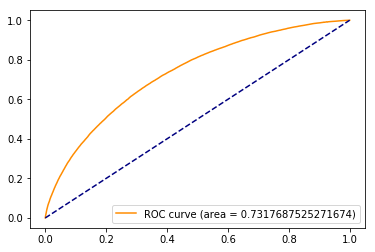

In [29]:
# check roc_auc on validation
# predictions = cat_model.predict(X_validation)
predictions_probs = cat_model.predict_proba(X_validation)
make_roc_plot(y_validation, predictions_probs[:,1])

In [30]:
y_test.value_counts(dropna=False)

0.0    173351
1.0     48891
Name: target_strict, dtype: int64

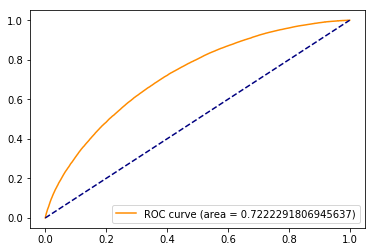

In [31]:
# check roc_auc on test
# predictions = cat_model.predict(X_validation)
predictions_probs = cat_model.predict_proba(X_test)
make_roc_plot(y_test.astype(int), predictions_probs[:,1])

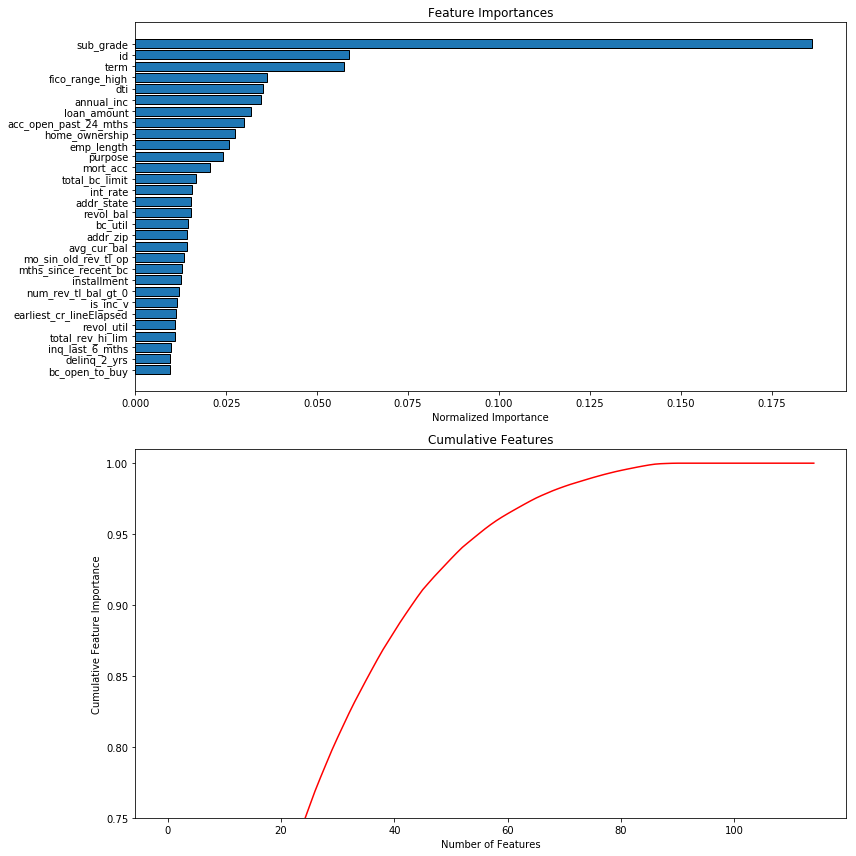

In [32]:
fi_df_catboost = make_feat_imp_plot(cat_model, 'catboost', train_pool, n_bar=30, figsize=(12,12))

# train lightgbm

In [33]:
def obj_to_cats_train(train_df):
    '''
    Input is the training df with object columns. Returns the df with obj cols converted to categorical cols.
    '''
    
    train_df = train_df.copy()
    cat_df = train_df.select_dtypes('object')
    ori_col_order = train_df.columns
    obj_cols = cat_df.columns
    train_df.drop(obj_cols, axis=1, inplace=True)
    coded_df = cat_df.copy()
    for col in obj_cols:
        cat_df[col] = cat_df[col].astype('category')
        coded_df[col] = cat_df[col].cat.codes
    to_ret = pd.concat([train_df, coded_df], axis=1)
    to_ret = to_ret[ori_col_order]
    return to_ret, cat_df

def obj_to_cats_eval(cat_df, eval_df):
    '''
    cat_df to encode eval_df. cat_df is 2nd output of obj_to_cats_train function
    '''
    eval_df = eval_df.copy()
    for col in cat_df.columns:
        eval_df[col] = pd.Categorical(eval_df[col], categories=cat_df[col].cat.categories)
        eval_df[col] = eval_df[col].cat.codes
    return eval_df

In [34]:
# create lgb datasets
lgb_otc_train, train_cat_df = obj_to_cats_train(X_train)
lgb_otc_validation = obj_to_cats_eval(train_cat_df, X_validation)
lgb_otc_test = obj_to_cats_eval(train_cat_df, X_test)

/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [35]:
(lgb_otc_train.columns == lgb_otc_validation.columns).all()
(lgb_otc_train.columns == lgb_otc_test.columns).all()

True

In [36]:
lgb_train = lgb.Dataset(lgb_otc_train, y_train)
lgb_validation = lgb.Dataset(lgb_otc_validation, y_validation)
# lgb_test = lgb.Dataset(lgb_otc_test, y_test)

In [37]:
cat_col_idx = []
for i,col in enumerate(lgb_otc_train.columns):
    if col in train_cat_df.columns:
        cat_col_idx.append(i)

In [38]:
lgb_otc_train.columns[cat_col_idx]

Index(['is_inc_v', 'addr_zip', 'is_inc_v_joint', 'emp_length',
       'application_type', 'disbursement_method', 'purpose', 'addr_state',
       'home_ownership', 'sub_grade', 'initial_list_status'],
      dtype='object')

In [39]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'categorical_feature':cat_col_idx
}

In [40]:
lgbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_validation,
                early_stopping_rounds=100)

/home/justin/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:661: UserWarning: categorical_feature keyword has been found in `params` and will be ignored. Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


[1]	valid_0's auc: 0.695515	valid_0's l2: 0.171423
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.699556	valid_0's l2: 0.170085
[3]	valid_0's auc: 0.700858	valid_0's l2: 0.168855
[4]	valid_0's auc: 0.705194	valid_0's l2: 0.167941
[5]	valid_0's auc: 0.705538	valid_0's l2: 0.1669
[6]	valid_0's auc: 0.705335	valid_0's l2: 0.165969
[7]	valid_0's auc: 0.70507	valid_0's l2: 0.165119
[8]	valid_0's auc: 0.705386	valid_0's l2: 0.164328
[9]	valid_0's auc: 0.705562	valid_0's l2: 0.163612
[10]	valid_0's auc: 0.705876	valid_0's l2: 0.162963
[11]	valid_0's auc: 0.706196	valid_0's l2: 0.16238
[12]	valid_0's auc: 0.706427	valid_0's l2: 0.161842
[13]	valid_0's auc: 0.706773	valid_0's l2: 0.161328
[14]	valid_0's auc: 0.706964	valid_0's l2: 0.160879
[15]	valid_0's auc: 0.707172	valid_0's l2: 0.160465
[16]	valid_0's auc: 0.707451	valid_0's l2: 0.160083
[17]	valid_0's auc: 0.707559	valid_0's l2: 0.159738
[18]	valid_0's auc: 0.707711	valid_0's l2: 0.159418
[19]	valid_0's

[159]	valid_0's auc: 0.72143	valid_0's l2: 0.153433
[160]	valid_0's auc: 0.721422	valid_0's l2: 0.153435
[161]	valid_0's auc: 0.721444	valid_0's l2: 0.153433
[162]	valid_0's auc: 0.721485	valid_0's l2: 0.153425
[163]	valid_0's auc: 0.721462	valid_0's l2: 0.153429
[164]	valid_0's auc: 0.721456	valid_0's l2: 0.153427
[165]	valid_0's auc: 0.721468	valid_0's l2: 0.153424
[166]	valid_0's auc: 0.721495	valid_0's l2: 0.153419
[167]	valid_0's auc: 0.721504	valid_0's l2: 0.15342
[168]	valid_0's auc: 0.72152	valid_0's l2: 0.153417
[169]	valid_0's auc: 0.721545	valid_0's l2: 0.153413
[170]	valid_0's auc: 0.721526	valid_0's l2: 0.153415
[171]	valid_0's auc: 0.721539	valid_0's l2: 0.153413
[172]	valid_0's auc: 0.721536	valid_0's l2: 0.153411
[173]	valid_0's auc: 0.721581	valid_0's l2: 0.153402
[174]	valid_0's auc: 0.721627	valid_0's l2: 0.153392
[175]	valid_0's auc: 0.721611	valid_0's l2: 0.153393
[176]	valid_0's auc: 0.72162	valid_0's l2: 0.153392
[177]	valid_0's auc: 0.721613	valid_0's l2: 0.1533

[315]	valid_0's auc: 0.723174	valid_0's l2: 0.153113
[316]	valid_0's auc: 0.723162	valid_0's l2: 0.153115
[317]	valid_0's auc: 0.723157	valid_0's l2: 0.153115
[318]	valid_0's auc: 0.723158	valid_0's l2: 0.153115
[319]	valid_0's auc: 0.723148	valid_0's l2: 0.153116
[320]	valid_0's auc: 0.72317	valid_0's l2: 0.153111
[321]	valid_0's auc: 0.723161	valid_0's l2: 0.153113
[322]	valid_0's auc: 0.723158	valid_0's l2: 0.153114
[323]	valid_0's auc: 0.723163	valid_0's l2: 0.153115
[324]	valid_0's auc: 0.723161	valid_0's l2: 0.153118
[325]	valid_0's auc: 0.723153	valid_0's l2: 0.153119
[326]	valid_0's auc: 0.723151	valid_0's l2: 0.153121
[327]	valid_0's auc: 0.723185	valid_0's l2: 0.153115
[328]	valid_0's auc: 0.723158	valid_0's l2: 0.15312
[329]	valid_0's auc: 0.723144	valid_0's l2: 0.153122
[330]	valid_0's auc: 0.723149	valid_0's l2: 0.153124
[331]	valid_0's auc: 0.723124	valid_0's l2: 0.153127
[332]	valid_0's auc: 0.723123	valid_0's l2: 0.153127
[333]	valid_0's auc: 0.723125	valid_0's l2: 0.15

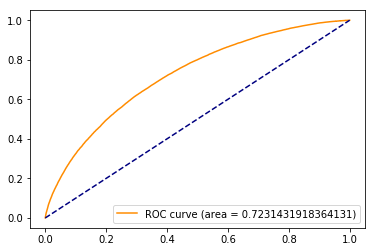

In [41]:
# check roc_auc on validation
predictions_probs = lgbm.predict(lgb_otc_validation)
make_roc_plot(y_validation, predictions_probs)

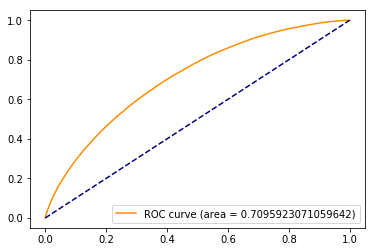

In [42]:
# check roc_auc on validation
predictions_probs = lgbm.predict(lgb_otc_test)
make_roc_plot(y_test, predictions_probs)

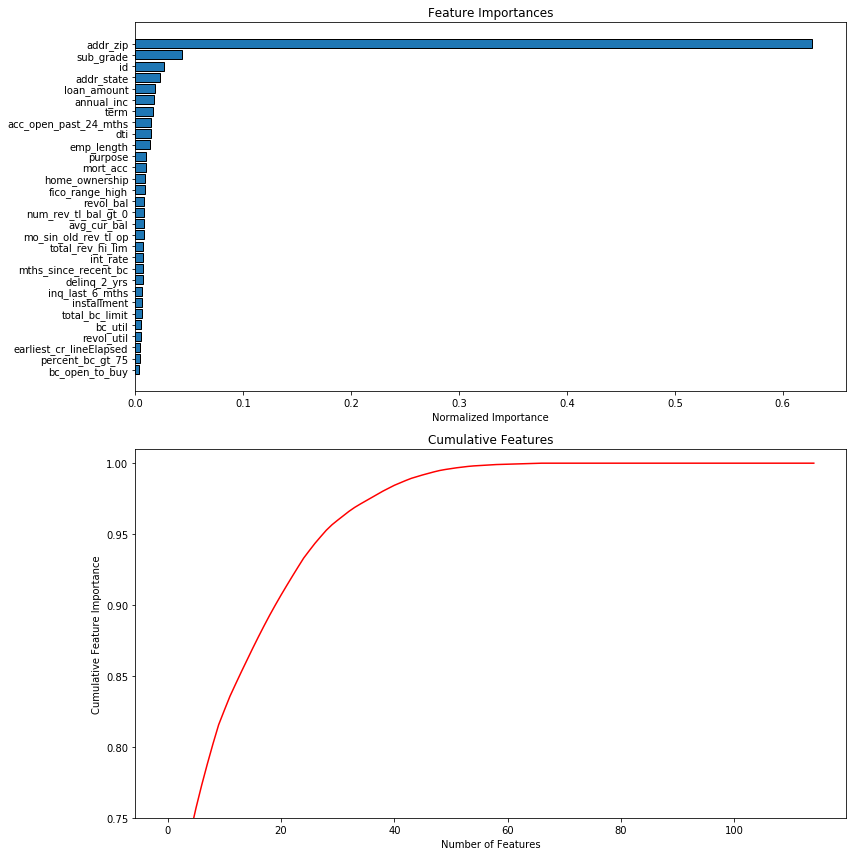

In [43]:
fi_df_lgbm = make_feat_imp_plot(lgbm, 'lightgbm', lgb_train, n_bar=30, figsize=(12,12))

# Shap values

In [44]:
import shap
shap.initjs()

In [45]:
cat_explainer = shap.TreeExplainer(cat_model)
lgbm_explainer = shap.TreeExplainer(lgbm)

In [46]:
cat_shap_values = cat_explainer.shap_values(train_pool)
lgbm_shap_values = lgbm_explainer.shap_values(lgb_otc_train)

The model has complex ctrs, so the SHAP values will be calculated approximately.


In [107]:
n_samp = 100
samp_idx = np.random.choice(len(cat_shap_values), size=n_samp, replace=False)

In [108]:
cat_predictions_probs = cat_model.predict_proba(X_train.iloc[samp_idx])
cat_predictions = cat_model.predict(X_train.iloc[samp_idx])

In [109]:
cat_explainer.expected_value

-1.448483736600437

In [110]:
ind_idx = 42
shap.force_plot(cat_explainer.expected_value, cat_shap_values[samp_idx][ind_idx,:], X_train.iloc[samp_idx,:].iloc[ind_idx,:])

In [111]:
# ind_idx = 42
# shap.force_plot(lgbm_explainer.expected_value, lgbm_shap_values[samp_idx][ind_idx,:], X_train.iloc[samp_idx,:].iloc[ind_idx,:])

In [115]:
print(cat_predictions[ind_idx])
arr = cat_predictions_probs[ind_idx]
arr

0.0


array([0.83097279, 0.16902721])

In [91]:
cat_predictions_probs[ind_idx]

array([0.68938642, 0.31061358])

In [113]:
cat_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
# shap.dependence_plot("id", cat_shap_values, lgb_otc_train)

In [101]:
n_samp = 10000
samp_idx = np.random.choice(len(cat_shap_values), size=n_samp, replace=False)

/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([nan, nan])

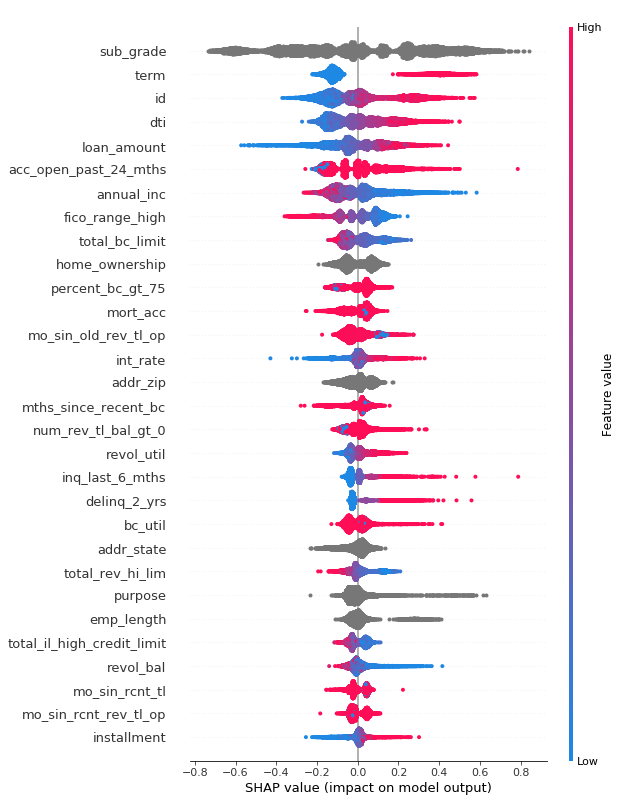

In [102]:
# catboost important 
shap.summary_plot(cat_shap_values[samp_idx], X_train.iloc[samp_idx], max_display=30,)

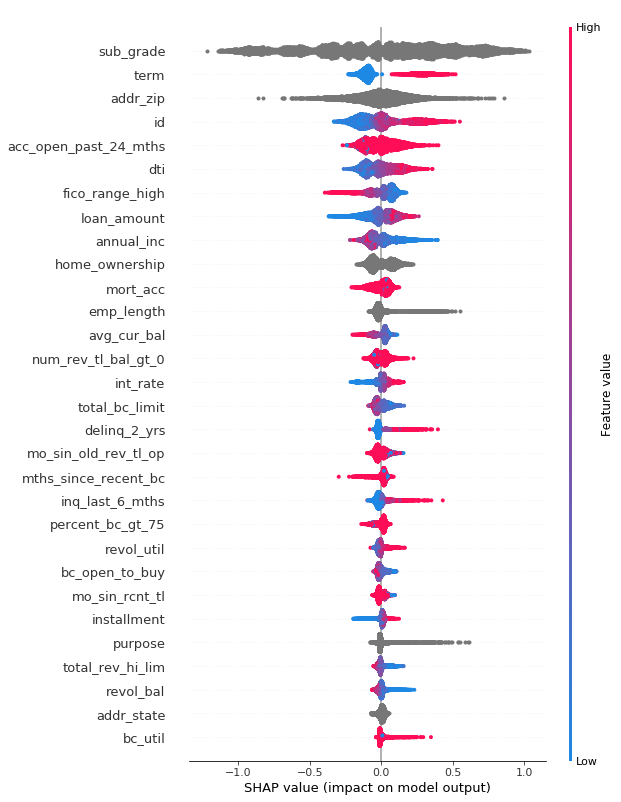

In [103]:
#lgbm
shap.summary_plot(lgbm_shap_values[samp_idx], X_train.iloc[samp_idx], max_display=30)

In [105]:
np.exp(1)

2.718281828459045

In [104]:
np.exp(-1)

0.36787944117144233

# PIMP

In [53]:
# I suspect addr_zip is coming up as highest importance because of the problem with feature importance based on counting number of times it splits or gini importance as referenced here (https://academic.oup.com/bioinformatics/article/26/10/1340/193348). Double check feature importance with PIMP method

In [95]:
type(train_pool)

catboost.core.Pool

In [96]:
Pool??

In [97]:
cat_model.get_feature_importance??

In [ ]:
# def get_feature_importances_and_names(model, data, model_type):
#     if model_type=='catboost'.lower():
#         feature_importances = model.get_feature_importance(data)
#         feature_names = data.get_feature_names()
#     elif model_type=='lightgbm'.lower():
#         feature_importances = lgbm.feature_importance()
#         feature_names = data.feature_name
#     else:
#         print('unknown model_type or not implemeneted yet')
#         return None
    
#     imps = []
#     feat_names = []
#     for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
#             imps.append(score)
#             feat_names.append(name)
#     return feat_names, imps

In [92]:
get_feature_importances_and_names(lgbm, lgb_train, 'lightgbm')

(['addr_zip',
  'sub_grade',
  'id',
  'annual_inc',
  'dti',
  'addr_state',
  'loan_amount',
  'acc_open_past_24_mths',
  'term',
  'emp_length',
  'purpose',
  'home_ownership',
  'fico_range_low',
  'installment',
  'int_rate',
  'mort_acc',
  'mo_sin_old_rev_tl_op',
  'inq_last_6_mths',
  'total_bc_limit',
  'avg_cur_bal',
  'mths_since_recent_bc',
  'revol_bal',
  'grade',
  'bc_util',
  'total_il_high_credit_limit',
  'total_rev_hi_lim',
  'num_rev_tl_bal_gt_0',
  'mo_sin_rcnt_tl',
  'revol_util',
  'bc_open_to_buy',
  'delinq_2_yrs',
  'percent_bc_gt_75',
  'total_acc',
  'tot_hi_cred_lim',
  'earliest_cr_lineElapsed',
  'num_actv_bc_tl',
  'mo_sin_old_il_acct',
  'num_actv_rev_tl',
  'mths_since_recent_inq',
  'mths_since_last_record',
  'pub_rec_bankruptcies',
  'mths_since_last_delinq',
  'fico_range_high',
  'earliest_cr_lineYear',
  'num_rev_accts',
  'num_il_tl',
  'num_bc_sats',
  'is_inc_v',
  'tot_cur_bal',
  'num_tl_op_past_12m',
  'mo_sin_rcnt_rev_tl_op',
  'total_ba

In [93]:
get_feature_importances_and_names(cat_model, train_pool, 'catboost')

(['sub_grade',
  'term',
  'grade',
  'id',
  'annual_inc',
  'dti',
  'acc_open_past_24_mths',
  'int_rate',
  'loan_amount',
  'fico_range_low',
  'home_ownership',
  'installment',
  'purpose',
  'addr_state',
  'emp_length',
  'is_inc_v',
  'revol_bal',
  'mo_sin_old_rev_tl_op',
  'mort_acc',
  'mths_since_recent_bc',
  'addr_zip',
  'earliest_cr_lineElapsed',
  'total_bc_limit',
  'inq_last_6_mths',
  'bc_util',
  'avg_cur_bal',
  'revol_util',
  'total_il_high_credit_limit',
  'total_acc',
  'tot_hi_cred_lim',
  'percent_bc_gt_75',
  'mths_since_last_record',
  'mo_sin_old_il_acct',
  'mo_sin_rcnt_tl',
  'total_rev_hi_lim',
  'num_actv_rev_tl',
  'delinq_2_yrs',
  'num_tl_op_past_12m',
  'pct_tl_nvr_dlq',
  'num_rev_tl_bal_gt_0',
  'bc_open_to_buy',
  'mths_since_recent_inq',
  'num_rev_accts',
  'mo_sin_rcnt_rev_tl_op',
  'num_il_tl',
  'num_bc_tl',
  'num_actv_bc_tl',
  'fico_range_high',
  'mths_since_last_delinq',
  'pub_rec_bankruptcies',
  'earliest_cr_lineYear',
  'mths_si

In [ ]:
def PIMP_lgbm(X_train, y_train, s, model, model_type, data):
    '''
    s = number of times to permute response variable (y)
    data = special data type for each model type (catboost=pool, lgb.Dataset)
    '''
    # set variables to match the paper's notation
    P = X_train
    l = y_train
    
    

In [83]:
np.random.seed = 42

In [84]:
np.random.random(2)

array([ 0.25796,  0.69399])

In [40]:
%%time
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

CPU times: user 1min 15s, sys: 32.2 s, total: 1min 47s
Wall time: 39.2 s


In [41]:
%%time
earlystop_params = params.copy()
earlystop_params.update({
    'od_type': 'Iter',
    'od_wait': 40
})
earlystop_model = CatBoostClassifier(**earlystop_params)
earlystop_model.fit(train_pool, eval_set=validate_pool);

CPU times: user 39.5 s, sys: 13.9 s, total: 53.5 s
Wall time: 16.5 s


In [42]:
print('Simple model tree count: {}'.format(model.tree_count_))
print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Early-stopped model tree count: {}'.format(earlystop_model.tree_count_))
print('Early-stopped model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, earlystop_model.predict(X_validation))
))

Simple model tree count: 500
Simple model validation accuracy: 0.8264

Early-stopped model tree count: 177
Early-stopped model validation accuracy: 0.8259


In [43]:
current_params = params.copy()
current_params.update({
    'iterations': 10
})
model = CatBoostClassifier(**current_params).fit(X_train, y_train, categorical_features_indices)
# Get baseline (only with prediction_type='RawFormulaVal')
baseline = model.predict(X_train, prediction_type='RawFormulaVal')
# Fit new model
model.fit(X_train, y_train, categorical_features_indices, baseline=baseline);

In [47]:
model = CatBoostClassifier(iterations=10, random_seed=42, logging_level='Silent', task_type='GPU').fit(train_pool)
ntree_start, ntree_end, eval_period = 3, 9, 2
predictions_iterator = model.staged_predict(validate_pool, 'Probability', ntree_start, ntree_end, eval_period)
for preds, tree_count in zip(predictions_iterator, range(ntree_start, ntree_end, eval_period)):
    print('First class probabilities using the first {} trees: {}'.format(tree_count, preds[:5, 1]))

Learning rate set to 0.5
First class probabilities using the first 3 trees: [ 0.45145  0.46118  0.48875  0.45145  0.46785]
First class probabilities using the first 5 trees: [ 0.44342  0.41995  0.44456  0.45629  0.41745]
First class probabilities using the first 7 trees: [ 0.45365  0.40427  0.47062  0.46765  0.39487]


/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'CatBoost._staged_predict' raised StopIteration
  after removing the cwd from sys.path.


In [48]:
model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent', task_type='GPU').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Learning rate set to 0.5
term: 16.79683255021069
grade: 11.580175463941956
sub_grade: 9.976510088084364
is_inc_v: 7.519905710810429
id: 4.513394906270556
dti: 4.5033100071821295
acc_open_past_24_mths: 4.1289493045495576
annual_inc: 4.048435616009242
installment: 3.113161607025451
tot_cur_bal: 2.456818120974609
loan_amount: 2.2109000248906594
home_ownership: 2.185399562096125
fico_range_high: 1.9464914358316547
emp_length: 1.8122132123140413
mort_acc: 1.727228365539546
mo_sin_old_rev_tl_op: 1.404979933915236
total_bc_limit: 1.327350348301493
addr_state: 1.2036972148913248
purpose: 1.1776397521947746
revol_bal: 1.1490764385926258
inq_last_6_mths: 1.0738694722686073
mths_since_recent_bc: 1.0351845934664508
bc_util: 0.9919898172056723
total_il_high_credit_limit: 0.8811459255963657
addr_zip: 0.7965982496116378
revol_util: 0.6197927833375273
total_rev_hi_lim: 0.5647149665058402
mths_since_last_record: 0.5566063237012878
delinq_2_yrs: 0.5276702571105449
num_rev_tl_bal_gt_0: 0.5220006474460032

In [39]:
eval_metrics = model.eval_metrics(validate_pool, ['AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [63]:
model.eval_metrics??

In [38]:
eval_metrics

NameError: name 'eval_metrics' is not defined

In [50]:
print(eval_metrics['AUC'][:6])

[0.7017919690000723, 0.7066406065097321, 0.7116699286215635, 0.7152092974099552, 0.7172592275155356, 0.7190082978580752]


In [152]:
jul_17_first_mort = 119655.75 + 1000 + 1000 - 19.20 -10.06 - 37.38 - 97.99 - 1882.77

In [154]:
jul_17_first_mort 

119608.34999999999

In [163]:
oct_31_2017_wali_paid_yzj = 119655.75 + 1000 + 1000 - 19.20 -10.06 - 37.38 - 97.99 - 1882.77 + 950 + 900 + 1516.13 + 900 + 950 + 2000 - 1192 + -46.78 - 41.83 - 34.12 - 35.45 - 37.41 - 630.27 - 525.70 - 33.54 -1882.77 + .17 + 1509.00 + 1000 - 1882.77 + .03 + .08 + 1000 + 950 + .03 + .08 + 1000 + 950 #Oct 31 2017 Wali paid YZJ

In [165]:
dec_8_2017_justin_charge_mortg = oct_31_2017_wali_paid_yzj - 19.60 - 81.03 - 1882.77 - 275 - 1882.77 + .03 + .08 + 950 - 1882.77 #Dec 8 2017 Justin CHarged YZJ for mort

In [168]:
feb_12_2018_justin_charge_mortg = dec_8_2017_justin_charge_mortg - 700 - 1 - 55 - 4 + .08 + .03 + 950 - 1882.77 + .08 + .03 - 55.01 - 6.59 + 950 - 1882.77 #feb 12 2018 justin charged yzj for mortgage

In [170]:
may_1_2018_justin_charge_mortg = feb_12_2018_justin_charge_mortg + .08 + .03 + 950 - 1882.77 + 950 + .08 + .03 + 950 + .03 + .08 - 1882.77 #what happened to mort charge in apr 2018? may 1 2018 justin charged morg

In [172]:
sept_13_2018 = may_1_2018_justin_charge_mortg - 10000 - 1882.77 + 900 + 950 - 375.99 + .08 + .04 - 1882.77 - 60 + 950 + .08 + 1950 + .05 +180135.71 + 257.04 - 2088.66 - 42.91 + 950 + 975 +.08 + .05 + 287.87 -18.66 - 2077.74 + .08 + .05 + 975 + 289.06 - 2077.74 # caught up until 9 13 2018

In [177]:
sept_13_2018

286328.22000000003

In [176]:
sept_13_2018-(180969.68 + 16089.54 + 2900.46 + 5001.04) - 10000

71367.50000000003

# old method with fastai, others

In [11]:
X, y, na_dict, mapper = jproc_df(done_loans, one_hot=True)

No specified target column, assuming target already separated
Turning categoricals into one_hot representation
Calculating means/medians/std_devs . . .
100%|██████████| 105/105 [00:00<00:00, 138.28it/s]
Making _isnull indicator columns . . .
100%|██████████| 75/75 [00:00<00:00, 119.97it/s]
Normalizing all non-categorical and non-_isnull columns . . .
100%|██████████| 180/180 [00:00<00:00, 338.87it/s]
Categorical cols: ['application_type', 'emp_length', 'addr_state', 'disbursement_method', 'is_inc_v_joint', 'grade', 'purpose', 'is_inc_v', 'initial_list_status', 'addr_zip', 'home_ownership', 'sub_grade']


Made _isnull cols for: ['tot_cur_bal', 'num_tl_12_0dpd_2m', 'num_accts_ever_12_0_ppd', 'num_tl_30dpd', 'sec_app_inq_last_6_mths', 'acc_open_past_24_mths', 'inq_last_12m', 'mths_since_last_record', 'mo_sin_old_il_acct', 'mths_since_recent_bc_dlq', 'sec_app_open_acc', 'open_rv_24m', 'num_op_rev_tl', 'pct_tl_nvr_dlq', 'sec_app_open_act_il', 'num_bc_tl', 'sec_app_fico_range_high', 'mo_sin_

In [12]:
X['target'] = eval_loan_info[eval_loan_info['id'].isin(done_loan_ids)]['target_strict']

In [13]:
X['target'].value_counts(dropna=False)

0    702001
1    156823
Name: target, dtype: int64

In [14]:
eval_loan_info['loan_status'].value_counts(dropna=True)

current        1197415
paid            602055
charged_off     149565
late_120         26418
grace_15         21070
late_30           7067
defaulted          325
Name: loan_status, dtype: int64

In [15]:
corrs = X.corr()

In [16]:
cor_targ = corrs['target'].sort_values(ascending=True)

In [17]:
cor_targ.to_pickle(f'{data_path}/done_loans_dummy_corr_target_strict.pkl')

In [18]:
cor_targ.dropna(inplace=True)

In [19]:
# least correlated 20

print('least correlated__________________\n', cor_targ[:20])
print('most correlated__________________\n', cor_targ[-20:])

least correlated__________________
 grade_A                    -0.149800
fico_range_low             -0.130366
fico_range_high            -0.130365
grade_B                    -0.103978
bc_open_to_buy             -0.079578
avg_cur_bal                -0.070218
tot_hi_cred_lim            -0.069699
total_bc_limit             -0.067701
sub_grade_A1               -0.067350
sub_grade_A4               -0.063750
sub_grade_A5               -0.062220
tot_cur_bal                -0.062196
mort_acc                   -0.061532
home_ownership_mortgage    -0.060920
sub_grade_A2               -0.060148
sub_grade_A3               -0.058702
disbursement_method_Cash   -0.055989
mo_sin_rcnt_tl             -0.054267
sub_grade_B1               -0.054255
sub_grade_B2               -0.050641
Name: target, dtype: float64
most correlated__________________
 sub_grade_E2             0.058657
grade_G                  0.058935
home_ownership_rent      0.059289
is_inc_v_platform        0.061280
loan_amount             

In [20]:
# correlations look weak. Use lgbm and random_forest_classifier to get feature importances for more info
import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding

y = X['target']
X.drop('target', axis=1, inplace=True)

In [26]:
set_rf_samples(50000)
clf = RandomForestClassifier(n_estimators = 50, random_state=0, max_depth=20, verbose=True)

In [30]:
clf.fit(X, y)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=True,
            warm_start=False)

In [34]:
fi = rf_feat_importance(clf, X); fi[:30]

,cols,imp
2,int_rate,0.044125
18,term,0.025882
59,dti,0.022119
44,id,0.020900
75,loan_amount,0.017024
8,installment,0.016514
82,annual_inc,0.015798
9,fico_range_low,0.015642
34,tot_hi_cred_lim,0.015208
27,revol_util,0.014930


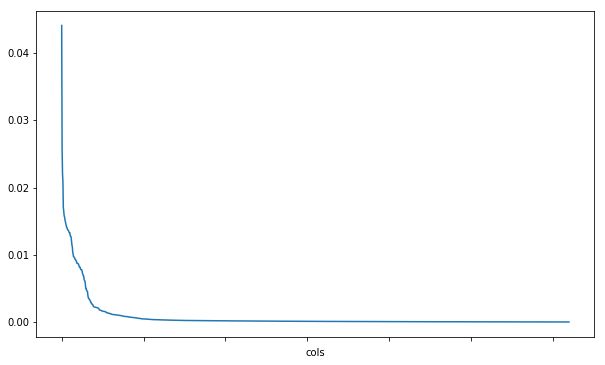

In [35]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [31]:
import j_utils.eval_results as er

In [ ]:
er.